In [1]:
from img_doc.document import Document
import matplotlib.pyplot as plt

2024-03-12 13:36:04.985945: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 13:36:05.013882: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 13:36:05.013936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 13:36:05.015072: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-12 13:36:05.019398: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 13:36:05.019738: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
doc = Document()
doc.set_from_path("img/1.jpg")

In [3]:
i_page = 0
page = doc.pages[i_page]

page.extract_paragraphs(method="words2paragraph")

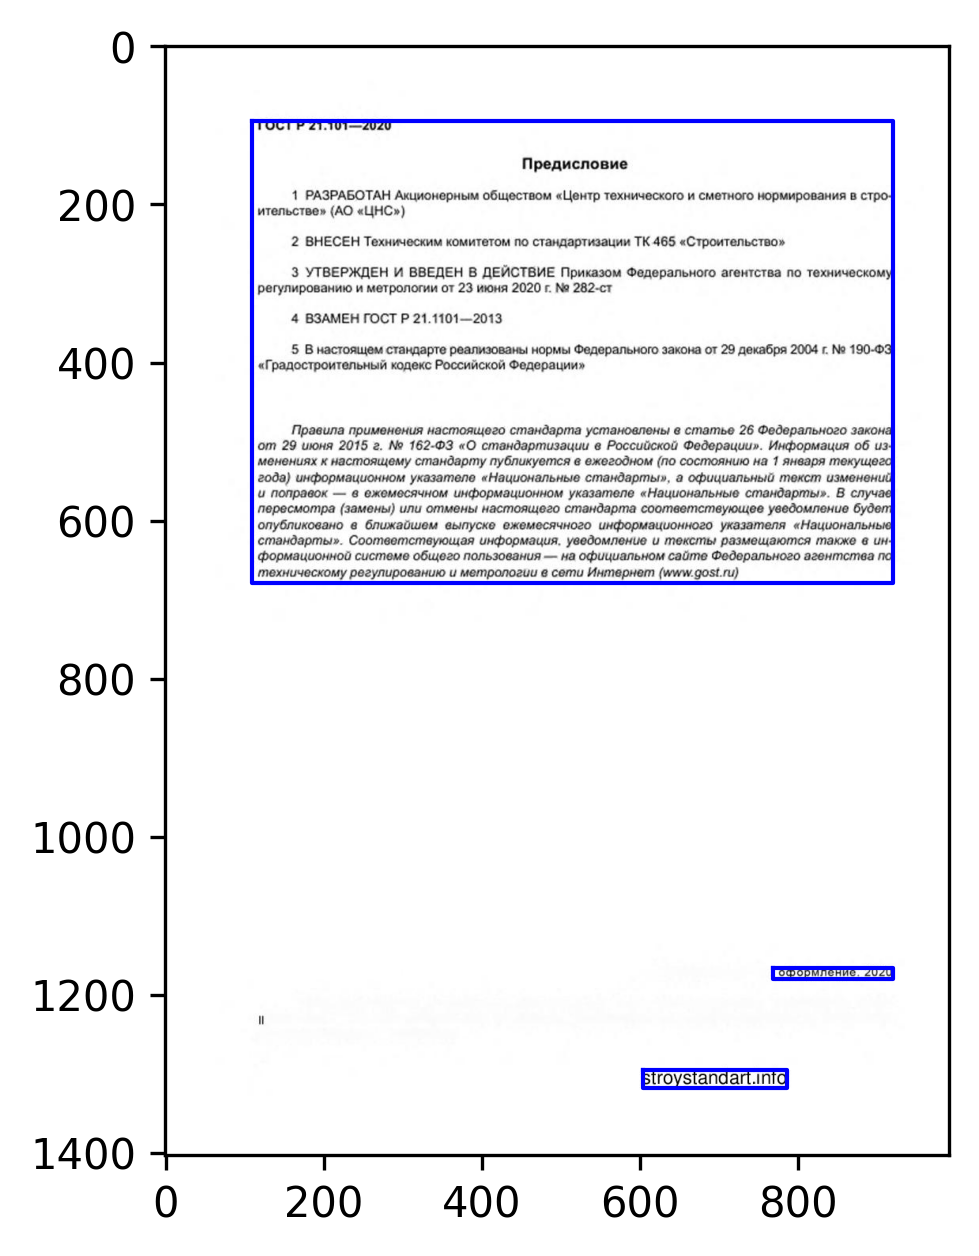

In [4]:
plt.figure(dpi=300)

page.image.plot()
for paragraph in page.paragraphs:
    paragraph.segment.plot()

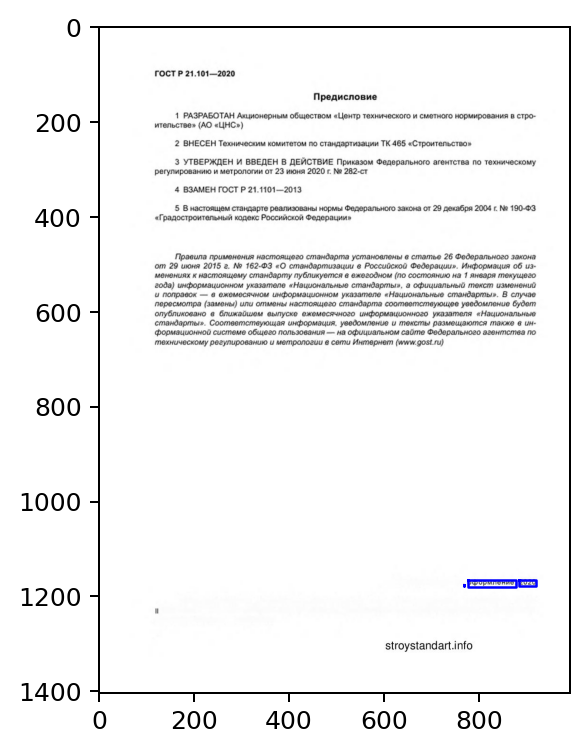

In [5]:
plt.figure(dpi=180)

page.image.plot()
for word in page.paragraphs[0].words:
    word.segment.plot()

In [49]:
from img_doc.image.segment_clusterizer import KMeanClusterizer
from img_doc.image import ImageSegment
kmean = KMeanClusterizer()
segment1 = ImageSegment(1,0,25,10)
segment2 = ImageSegment(1,13,30,23)
# segment3 = ImageSegment(60,40,89,50)
# segment4 = ImageSegment(93,40,108,50)
segments = [segment1, segment2]#, segment3, segment4]


dir_seg = [{'x_top_left': 307,
  'x_bottom_right': 348,
  'y_top_left': 370,
  'y_bottom_right': 379,
  'text': 'Keywords'},
 {'x_top_left': 353,
  'x_bottom_right': 385,
  'y_top_left': 370,
  'y_bottom_right': 377,
  'text': 'Forensic'},
 {'x_top_left': 388,
  'x_bottom_right': 434,
  'y_top_left': 370,
  'y_bottom_right': 379,
  'text': 'entomology'},
 {'x_top_left': 437,
  'x_bottom_right': 439,
  'y_top_left': 374,
  'y_bottom_right': 375,
  'text': '-'},
 {'x_top_left': 442,
  'x_bottom_right': 486,
  'y_top_left': 369,
  'y_bottom_right': 380,
  'text': 'Postrsortem'},
 {'x_top_left': 490,
  'x_bottom_right': 518,
  'y_top_left': 369,
  'y_bottom_right': 380,
  'text': 'interval'},
 {'x_top_left': 523,
  'x_bottom_right': 524,
  'y_top_left': 374,
  'y_bottom_right': 375,
  'text': '-'},
 {'x_top_left': 307,
  'x_bottom_right': 358,
  'y_top_left': 382,
  'y_bottom_right': 391,
  'text': 'Development'},
 {'x_top_left': 362,
  'x_bottom_right': 363,
  'y_top_left': 386,
  'y_bottom_right': 387,
  'text': '-'},
 {'x_top_left': 366,
  'x_bottom_right': 382,
  'y_top_left': 382,
  'y_bottom_right': 391,
  'text': 'Age'},
 {'x_top_left': 384,
  'x_bottom_right': 420,
  'y_top_left': 381,
  'y_bottom_right': 392,
  'text': 'estimates'},
 {'x_top_left': 424,
  'x_bottom_right': 425,
  'y_top_left': 386,
  'y_bottom_right': 387,
  'text': '-'},
 {'x_top_left': 428,
  'x_bottom_right': 450,
  'y_top_left': 382,
  'y_bottom_right': 389,
  'text': 'Insect'},
 {'x_top_left': 453,
  'x_bottom_right': 465,
  'y_top_left': 384,
  'y_bottom_right': 389,
  'text': 'sex'},
 {'x_top_left': 469,
  'x_bottom_right': 470,
  'y_top_left': 386,
  'y_bottom_right': 387,
  'text': '-'},
 {'x_top_left': 473,
  'x_bottom_right': 514,
  'y_top_left': 382,
  'y_bottom_right': 389,
  'text': 'Estinvation'},
 {'x_top_left': 306,
  'x_bottom_right': 340,
  'y_top_left': 397,
  'y_bottom_right': 404,
  'text': 'accuracy'}]
# segments = [ImageSegment(dict_2p=dict_) for dict_ in dir_seg]

# for seg in segments:
#     seg.plot()

# reds = kmean.cluster(segs)

# for seg in reds:
#     seg.plot(color="r")

# plt.ylim([60, 0])

In [50]:
import numpy as np

def get_index_hash( seg, dh, dw, ch, cw):
    x_c, y_c = seg.get_center()
    
    hash_i = int((y_c - ch) * dh)
    hash_j = int((x_c - cw) * dw)
    print((y_c - ch) * dh, (x_c - cw) * dw)
    return hash_i, hash_j


n = len(segments)

big_segment = ImageSegment(0, 0, 1, 1)
big_segment.set_segment_max_segments(segments)

h = big_segment.get_height()
w = big_segment.get_width()

coef = w / h

m_width = int(np.ceil((n * coef) ** 0.5))
m_height = int(np.ceil(m_width / coef))
print(m_width, m_height)
dh = (m_height-1)/h 
dw = (m_width-1)/w
ch = big_segment.y_top_left
cw = big_segment.x_top_left
hashkey = lambda seg: get_index_hash(seg, dh, dw, ch, cw)

hash_matrix = [[[] for i in range(m_width)] for j in range(m_height)]
for mi in hash_matrix:
    print(mi)
for i, seg in enumerate(segments):
    print(i)
    hash_i, hash_j = hashkey(seg)
    print("seg:", i, "cord:", hash_i, hash_j)
    hash_matrix[hash_i][hash_j].append(i)


2 2
[[], []]
[[], []]
0
0.21739130434782608 0.41379310344827586
seg: 0 cord: 0 0
1
0.7826086956521738 0.5172413793103449
seg: 1 cord: 0 0


In [31]:
np.floor(0.1)

0.0

In [ ]:
for mi in m:
    print(mi)

In [9]:
neighbors = []
for k in range(len(segs)):
    top_right_bottom_left = [k, k, k, k]
    for i, vec in enumerate(["top", "right", "bottom", "left"]):
        top_right_bottom_left[i] = kmean.get_neighbor_fun(segs, k, m,
                                                                 fun, 3, vec)
    neighbors.append(top_right_bottom_left)

In [10]:
neighbors

[[0, 0, 1, 0], [0, 1, 1, 1]]

In [11]:
distans = kmean.get_distans(neighbors, segs)
distans

[[0, 0, 3, 0], [3, 0, 0, 0]]

In [12]:
kmean.get_standart_distant(distans)

/home/daniil/program/python/project/layout_highlighter/imgDoc/env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/daniil/program/python/project/layout_highlighter/imgDoc/env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(nan, 3.0)

In [46]:
graph = kmean.get_graph_segments(segs, neighbors, None, 3.1, distans)
print(graph.get_nodes()[0])
print(graph.get_nodes()[1])
print(graph.get_edges())

(13.00, 5.00)
(16.00, 18.00)


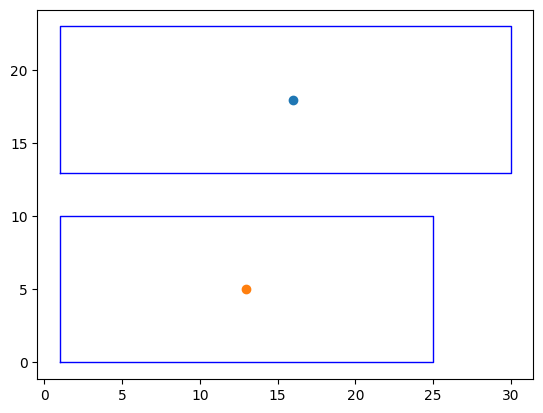

In [27]:
for seg in segs:
    seg.plot()

plt.scatter(16, 18)
plt.scatter(13, 5)

In [39]:
dist_row = 3 
dist_word = None

In [40]:
edges = []


for n1, ed_k in enumerate(neighbors):
    for vec, n2 in enumerate(ed_k):
        set_n = {n1, n2}
        print(set_n, edges)
        if n1 != n2 and not (set_n in edges):
            if (vec in (0, 2)) and (distans[n1][vec] <= dist_row) and (distans[n1][vec] > 0):
                edges.append(set_n)
            elif (vec in (1, 3)) and (distans[n1][vec] <= dist_word) and (distans[n1][vec] > 0):
                edges.append(set_n)

{0} []
{0} []
{0, 1} []
{0} [{0, 1}]
{0, 1} [{0, 1}]
{1} [{0, 1}]
{1} [{0, 1}]
{1} [{0, 1}]


In [41]:
from img_doc.image.segment_relationship import Graph
graph = Graph()

In [42]:
for i, seg in enumerate(segs):
    c1x, c1y = seg.get_center()
    index = graph.add_node(c1x, c1y)  # index_word+1

for edge in edges:
    n_list = list(edge)
    n1, n2 = n_list[0] + 1, n_list[1] + 1
    graph.add_edge(n1, n2)

In [43]:
graph.get_edges()